In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload

In [2]:
import numpy as np
import astropy.units as units
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.sparse as sparse
import copy

In [3]:
%autoreload 2
import dualpy as dp

In [4]:
t_in = np.arange(100) * units.s
t_max = t_in[-1] + 1 * units.s

In [5]:
omega = 2 * np.pi * (20.0/t_max) * units.rad
t0 = t_max/2
w = t_max/4

In [8]:
def f(t):
    return t**2 + 10 * t.unit**2
    # return np.cos(omega*t) * np.exp(-((t-t0)/(w/4))**2)

In [9]:
# Compute the function
x_in = f(t_in)
# Compute an appropriate perturbation
finfo = np.finfo(np.float32)
ptb_f = np.sqrt(finfo.eps)
ptb_a = ptb_f
ptb = np.maximum(np.abs(x_in * ptb_f), (ptb_a << x_in.unit))
dx = np.diag(ptb)
X_in = x_in[:, np.newaxis] + dx


In [10]:
t_out = t_in[:-1] + np.random.rand(t_in.size - 1) * units.s
x_out_true = f(t_out)

In [11]:
interpolator_v = dp.CubicSpline(t_in, x_in)
interpolator_m = dp.CubicSpline(t_in, X_in, axis=0)
x_out_spline = interpolator_v(t_out)
X_out_spline = interpolator_m(t_out)

In [12]:
J = (X_out_spline-x_out_spline[:,np.newaxis])/ptb[np.newaxis,:]

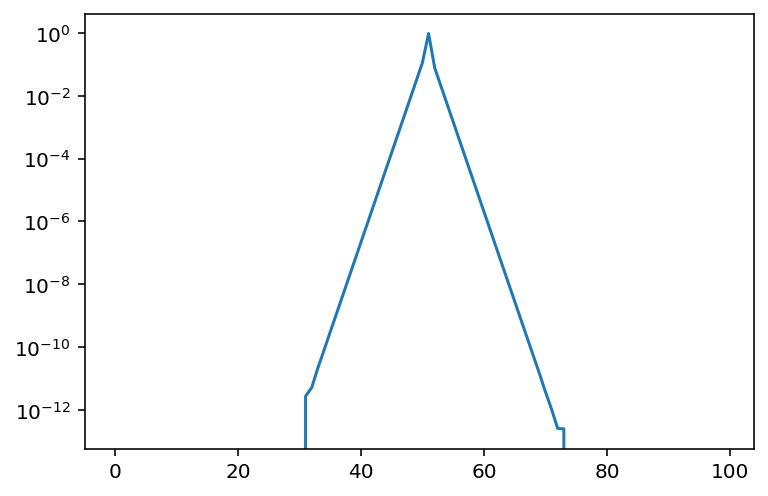

In [14]:
plt.semilogy(np.abs(J[50,:]))

In [ ]:
J.shape